## Traning

In [1]:
# Đảm bảo đang ở thư mục HR Analytics
!pwd
%cd ..

/mnt/d/Hp/Documents/University/Nam 3/HKI/LT_DS/HW02/23122046/notebooks
/mnt/d/Hp/Documents/University/Nam 3/HKI/LT_DS/HW02/23122046


In [2]:
# Import thư viện và module
import numpy as np
from src import *

### Load data

In [3]:
file_train_path = "./data/processed/train.npy"
data = np.load(file_train_path)

### Chia tập X và y

In [4]:
# Target
y = data['target'].astype(int)

# Features
feature_cols = [name for name in data.dtype.names if name != 'target']
X = np.column_stack([data[name].astype(float) for name in feature_cols])
print(X)
print(y)

[[  5.      0.92    2.    ...   0.      1.     36.   ]
 [ 77.      0.776   2.    ...   6.      5.     47.   ]
 [ 64.      0.624   0.    ...   0.      6.     83.   ]
 ...
 [  5.      0.92    2.    ...   6.      4.     44.   ]
 [ 94.      0.802   2.    ...   6.      2.     97.   ]
 [ 95.      0.855   0.    ...   0.      1.    127.   ]]
[1 0 0 ... 0 0 0]


### Check imbalance

In [5]:
y_str = y.astype(str)
classes, counts = np.unique(y_str, return_counts=True)
print(dict(zip(classes, counts)))

{'0': 14381, '1': 4777}


#### Dựa theo kết quả in ở trên, ta thấy dữ liệu đang bị lệch nặng bên label 0

### Xử lý imbalance

In [6]:
over = SMOTE(random_state=42)
X, y = over.fit_resample(X,y)
# Check lại có còn imbalance nữa ko
y_str = y.astype(str)
classes, counts = np.unique(y_str, return_counts=True)
print(dict(zip(classes, counts)))

{'0': 14381, '1': 14381}


##### Ok, giờ dữ liệu 2 bên đã cân bằng

### Chia tập train và test

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 0.2, random_state=42)
print(f"Độ dài tập train: {len(X_train)} dữ liệu")
print(f"Độ dài tập test: {len(X_test)} dữ liệu")

Độ dài tập train: 23010 dữ liệu
Độ dài tập test: 5752 dữ liệu


### Huấn luyện mô hình

##### Sau khi chia dữ liệu, ta đến bước tiếp theo là train mô hình và dự đoán. Ở đây em có sử dụng thêm mô hình là K-Nearest Neighbour vì:
- Mô hình cho kết quả tương đối tốt
- Mô hình tương đối đơn giản, chạy khá nhanh

Thích hợp để so sánh xem mô hình Decision Tree có thực sự chạy tốt không

#### Huấn luyện KNN
Quá trình huấn luyện khoảng 20s

In [8]:
KNN = KNNClassifier()
KNN.fit(X_train, y_train)

#### Kết quả KNN

In [9]:
y_pred_knn = KNN.predict(X_test)
print("Kết quả dự đoán của mô hình KNN:")
results_knn = cal_all_metrics(y_test, y_pred_knn)

Kết quả dự đoán của mô hình KNN:
Accuracy: 0.769297635605007
Precision: 0.7188471319581803
Recall: 0.8845618915159944
F1 Score: 0.793141075604053


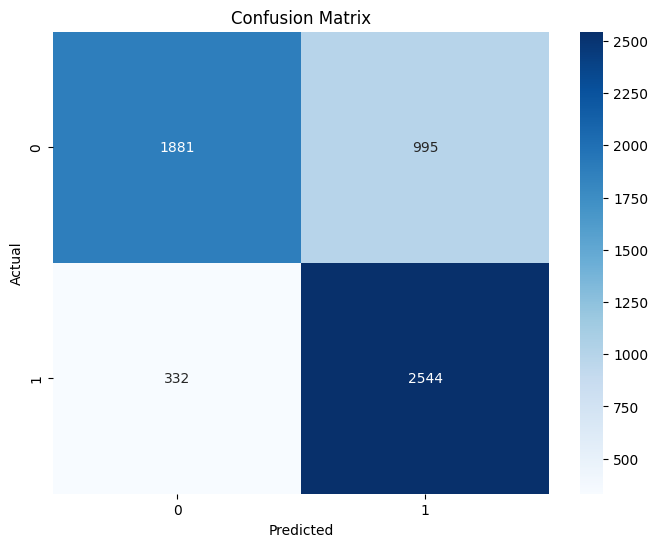

In [10]:
confusion_matrix_plot(y_test, y_pred_knn)

### Huấn luyện Decision Tree
Quá trình train khoảng 1 phút 20s

In [11]:
DecTree = DecisionTreeClassifier(max_depth=10)
DecTree.fit(X_train, y_train)

#### Kết quả của Decision Tree

In [12]:
y_pred_dect = DecTree.predict(X_test)
print("Kết quả đánh giá của mô hình Decision Tree")
results_dect = cal_all_metrics(y_test, y_pred_dect)

Kết quả đánh giá của mô hình Decision Tree
Accuracy: 0.8358831710709318
Precision: 0.8292433537832311
Recall: 0.8459666203059806
F1 Score: 0.8375215146299485


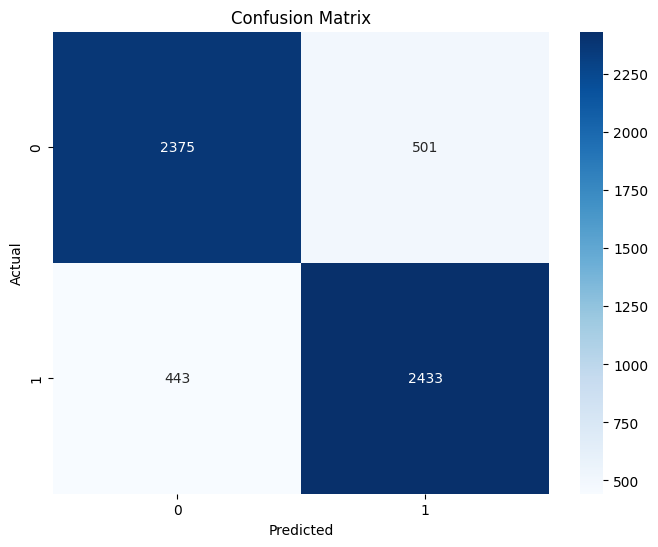

In [13]:
confusion_matrix_plot(y_test, y_pred_dect)

### So sánh results

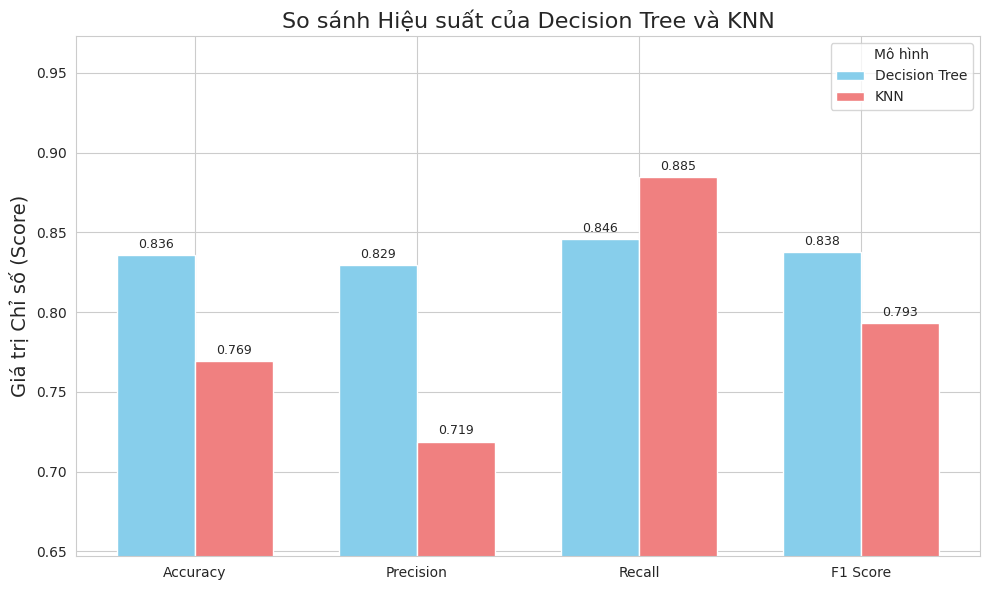

In [14]:
# Tên các chỉ số và tên mô hình
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
models = ['Decision Tree', 'KNN']
scores_dect = np.array(results_dect)
scores_knn = np.array(results_knn)
data_matrix = np.array([scores_dect, scores_knn])

visualize_model_results_comparison(
    model1_name='Decision Tree', 
    model1_results=results_dect, 
    model2_name='KNN', 
    model2_results=results_knn,
)

##### Nhận xét
- Nhìn một cách tổng quan, thì mô hình Decision Tree có kết quả tốt hơn so với KNN.
- Decision Tree có các kết quả metrics tương đối ổn định(khoảng 0.84), trong khi đó thì KNN lại có kết quả khá ko ổn định, precision khá thấp trong khi recall lại rất cao.
- Về thời gian: KNN huấn luyện nhanh hơn so với Decision Tree, do đó nên cũng dễ hiểu khi kết quả của KNN lại kém hơn Decision Tree

### Trả lời câu hỏi số 3
Bây giờ, ta sẽ quay lại với mục đích ban đầu. Ta cần tìm ra feature nào ảnh hưởng đến tỉ lệ chuyển việc nhất, ta sẽ quan sát importance score dưới đây

In [15]:
for feature_name, importance_score in zip(feature_cols, DecTree.feature_importances_):
    print(f"{feature_name}: {importance_score}")

city: 0.17599545858172558
city_development_index: 0.05370790600673413
gender: 0.11713577705979543
relevent_experience: 0.04805963625952282
enrolled_university: 0.06129372815202258
education_level: 0.07086215748026325
major_discipline: 0.03657046780722229
experience: 0.13760586754665213
company_size: 0.022288719848122023
company_type: 0.025953985677226926
last_new_job: 0.05982153756889578
training_hours: 0.19070475801181697


#### Nhận xét

- training_hours, city, experience là những feature quan trọng nhất, đóng góp nhiều nhất vào quyết định của cây.

- company_size, company_type, major_discipline ít quan trọng hơn, gần như không ảnh hưởng nhiều đến phân loại.

Như vậy là đã rõ ràng, training_hours là yếu tố ảnh hưởng đến tỉ lệ chuyển việc nhất, khá bất ngờ so với dự đoán ban đầu. Theo sau là city, khá đáng tiếc. Tất nhiên thì đây cũng chưa hẳn là câu trả lời hoàn toàn đúng, nhưng ít nhất là có cơ sở.
